<a href="https://colab.research.google.com/github/OlgaZy/Python_for_DA/blob/main/HW_10_3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/DA_in_IT/Data/yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [111]:
# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

In [112]:
# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [113]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,month_year
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1,2011-01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2,2011-01


In [114]:
monthly_stats = df.groupby('month_year').agg( Mean = ('count','mean') )
monthly_stats.head(5)

,Mean
month_year,
2011-01,54.645012
2011-02,73.641256
2011-03,86.849776
2011-04,111.026374
2011-05,174.809211


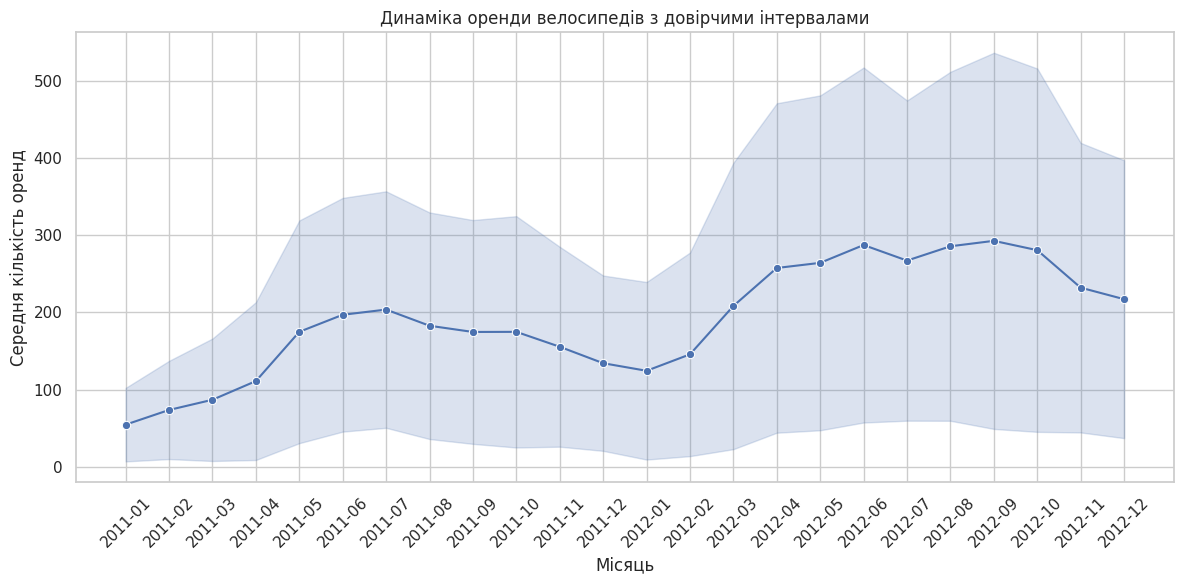

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(df, x='month_year', y='count', errorbar='sd', marker="o")
plt.title('Динаміка оренди велосипедів з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

Найбільша невизначеність у даних спостерігається у ті місяці, де синя область довкола лінії середнього значення (довірчий інтервал) найширша.

На графіку це:
- Травень–жовтень 2011 року (2011-05, 2011-06)
- Квітень-жовтень 2012 року (2012-04, 2012-05, 2012-06)

Саме в ці періоди розкид значень оренд найбільший, тобто середня кількість оренд варіюється сильніше від вибірки до вибірки, і прогнозування стає менш точним.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

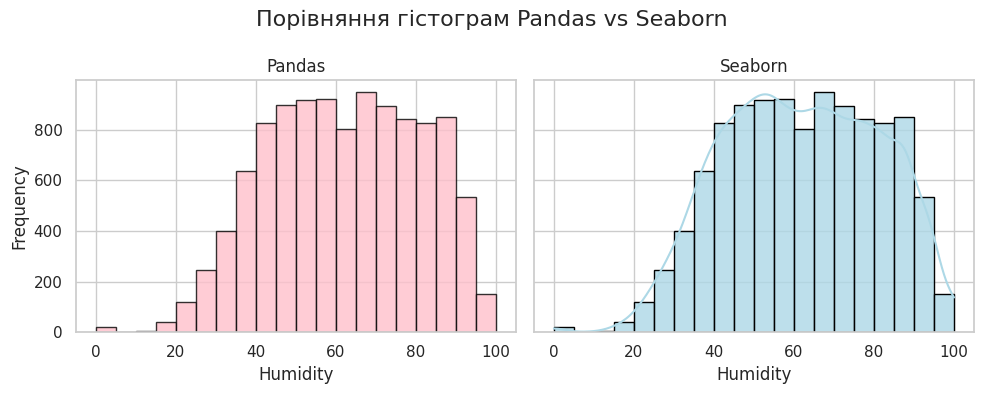

In [116]:
# Створюємо фігуру та осі
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# 1. Pandas
df["humidity"].plot(kind="hist", bins=20, ax=axes[0], color="pink", alpha=0.8, edgecolor="black")
axes[0].set_title("Pandas")
axes[0].set_xlabel("Humidity")

# 2. Seaborn
sns.histplot(data=df, x="humidity", bins=20, ax=axes[1], color="lightblue", alpha=0.8, edgecolor="black", kde=True)
axes[1].set_title("Seaborn")
axes[1].set_xlabel("Humidity")

plt.suptitle("Порівняння гістограм Pandas vs Seaborn", fontsize=16)

plt.tight_layout()
plt.show()


**Яка візуальна різниця між Pandas та Seaborn гістограмами?**
- ніякої візуальної різниці немає, окрім того, що у pandas немає вбудованого параметра kde=True, тому треба окремо малювати KDE криву, якщо вона необхідна.

**Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?**
- параметр kde=True додає до гістограми криву оцінки щільності розподілу (KDE криву). Це гладка лінія, яка показує, як розподілені дані. Вона допомагає
побачити форму розподілу (один пік чи кілька), де значень найбільше, та вона не залежить від кількості бінів у гістограмі.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [121]:
hourly_stats = df.groupby(['hour', 'weather']).agg( sum = ('count','sum') )
hourly_stats.head(10)

sum
hour weather       
0    1        18214
     2         6106
     3          768
1    1        10397
     2         4246
     3          729
2    1         6933
     2         2883
     3          443
3    1         3408

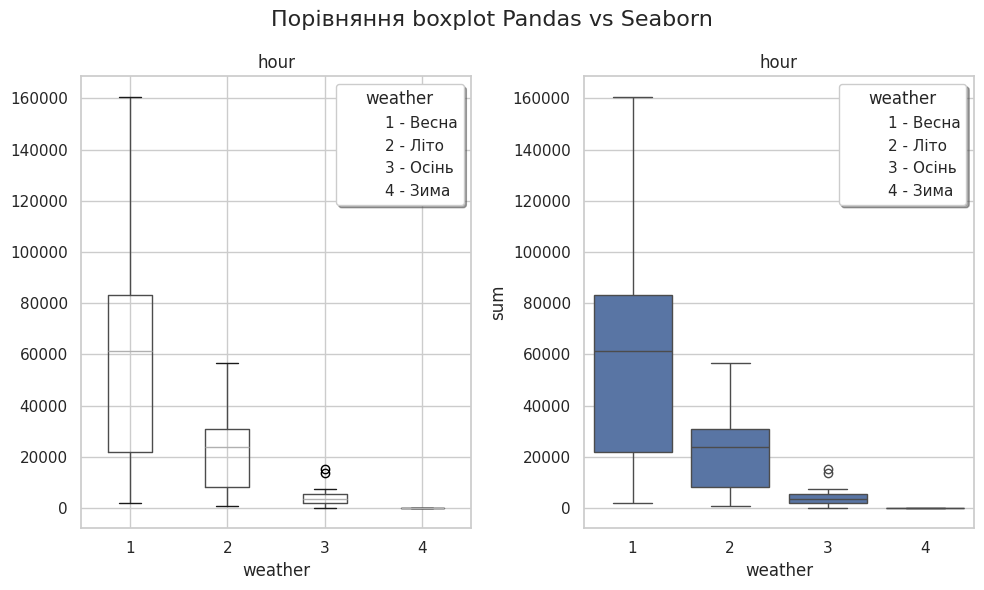

In [134]:
# Створюємо фігуру та осі
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# 1. Pandas
hourly_stats.boxplot(column="sum", by="weather", ax=axes[0], grid=True)
axes[0].set_title("hour")
axes[0].set_xlabel("weather")
axes[0].legend(title='weather', handles=handles, loc='upper right', shadow=True, frameon=True)

# 2. Seaborn
sns.boxplot(data=hourly_stats, x="weather", y="sum", ax=axes[1])
axes[1].set_title("hour")
axes[1].set_xlabel("weather")
axes[1].legend(title='weather', handles=handles, loc='upper right', shadow=True, frameon=True)

# Додаємо блок з підписами (легенду)
handles = [
    plt.Line2D([], [], linestyle="", label="1 - Весна"),
    plt.Line2D([], [], linestyle="", label="2 - Літо"),
    plt.Line2D([], [], linestyle="", label="3 - Осінь"),
    plt.Line2D([], [], linestyle="", label="4 - Зима")
]

plt.suptitle("Порівняння boxplot Pandas vs Seaborn", fontsize=16)

plt.tight_layout()
plt.show()

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [135]:
# Розрахунок кореляційної матриці
corr_matrix = df[['season', 'weather', 'temp',	'atemp', 'humidity', 'windspeed', 'count']].corr()
corr_matrix

,season,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
weather,0.008879,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.258689,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


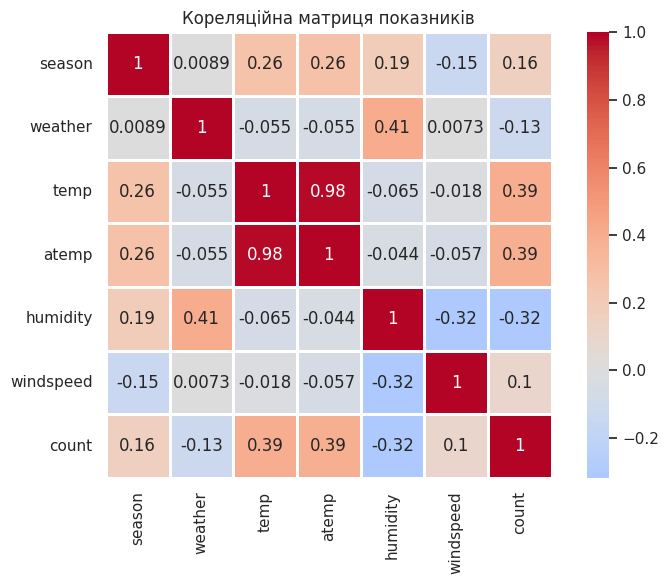

In [136]:
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1)

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

### 1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
 - temp (температура): коефіцієнт кореляції 0.39. atemp (сприймана температура): коефіцієнт кореляції 0.39. Ці дві змінні мають найсильніший позитивний зв’язок з кількістю оренди.

### 2. Яка кореляція між temp та atemp? Чому?
 - Кореляція між temp і atemp — 0.98 (майже максимальна пряма залежність).
Причина: temp і atemp — це фактична температура та її сприймання, ці показники рухаються майже синхронно, часто atemp навіть обчислюється на основі temp із поправкою на вологість, вітер тощо.

### 3. Які змінні мають негативну кореляцію?
 - humidity та count: кореляція −0.32 (чим вище вологість, тим менше оренд).
 - windspeed та count: кореляція 0.1 (слабка позитивна, проте з іншими параметрами — наприклад, з humidity — −0.32).
 - season і windspeed: кореляція −0.15.
 - weather та count: кореляція −0.13.
 - Найяскравішим "негативним" фактором для кількості оренд є висока вологість повітря (humidity).

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


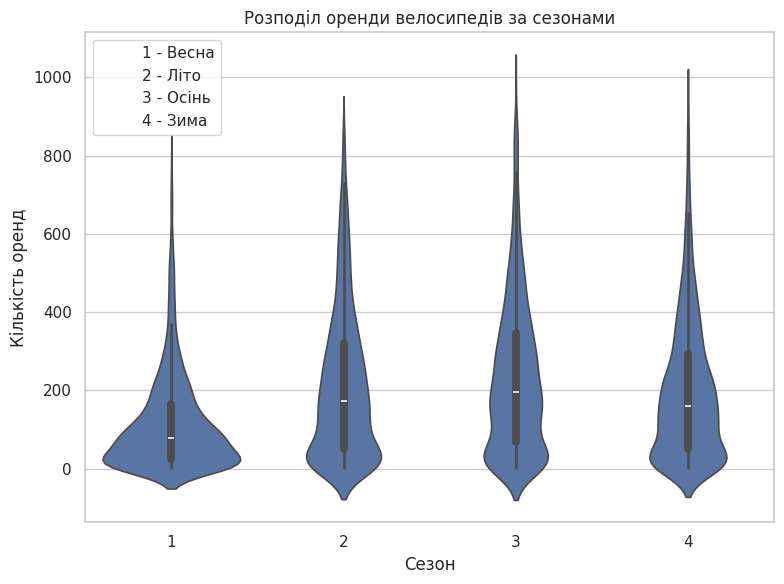

In [137]:
# Побудова violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="season", y="count" )

plt.title("Розподіл оренди велосипедів за сезонами", fontsize=12)
plt.xlabel("Сезон")
plt.ylabel("Кількість оренд")
# Додаємо блок з підписами (легенду)
handles = [
    plt.Line2D([], [], linestyle="", label="1 - Весна"),
    plt.Line2D([], [], linestyle="", label="2 - Літо"),
    plt.Line2D([], [], linestyle="", label="3 - Осінь"),
    plt.Line2D([], [], linestyle="", label="4 - Зима")
]

plt.legend(handles=handles, title="", loc="upper left", frameon=True)

plt.tight_layout()
plt.show()

### Що показує "товщина" violin plot?
 - Показує, де зосереджена найбільша кількість оренд. Наприклад, у сезоні 1 (зима) найбільше випадків оренди припадає на низькі значення (графік широкий внизу).

### В якому сезоні найбільша варіабельність оренди?
 - Найбільша варіабельність там, де "violin" розтягнутий по осі y і охоплює великий діапазон значень. Найбільший діапазон по осі Y видно у сезоні 3 (літо) - кількість оренд сильно коливається від дуже малих до дуже великих значень. Це означає, що влітку люди катаються більше, але попит залежить від умов (погода, свята).

### Яка перевага violin plot над звичайним box plot?
 - Violin plot поєднує в собі і box plot, і щільність розподілу.
Box plot показав би тільки медіану, квартилі й викиди. А violin plot додатково показує форму розподілу: видно, що в деяких сезонах оренда має піки.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

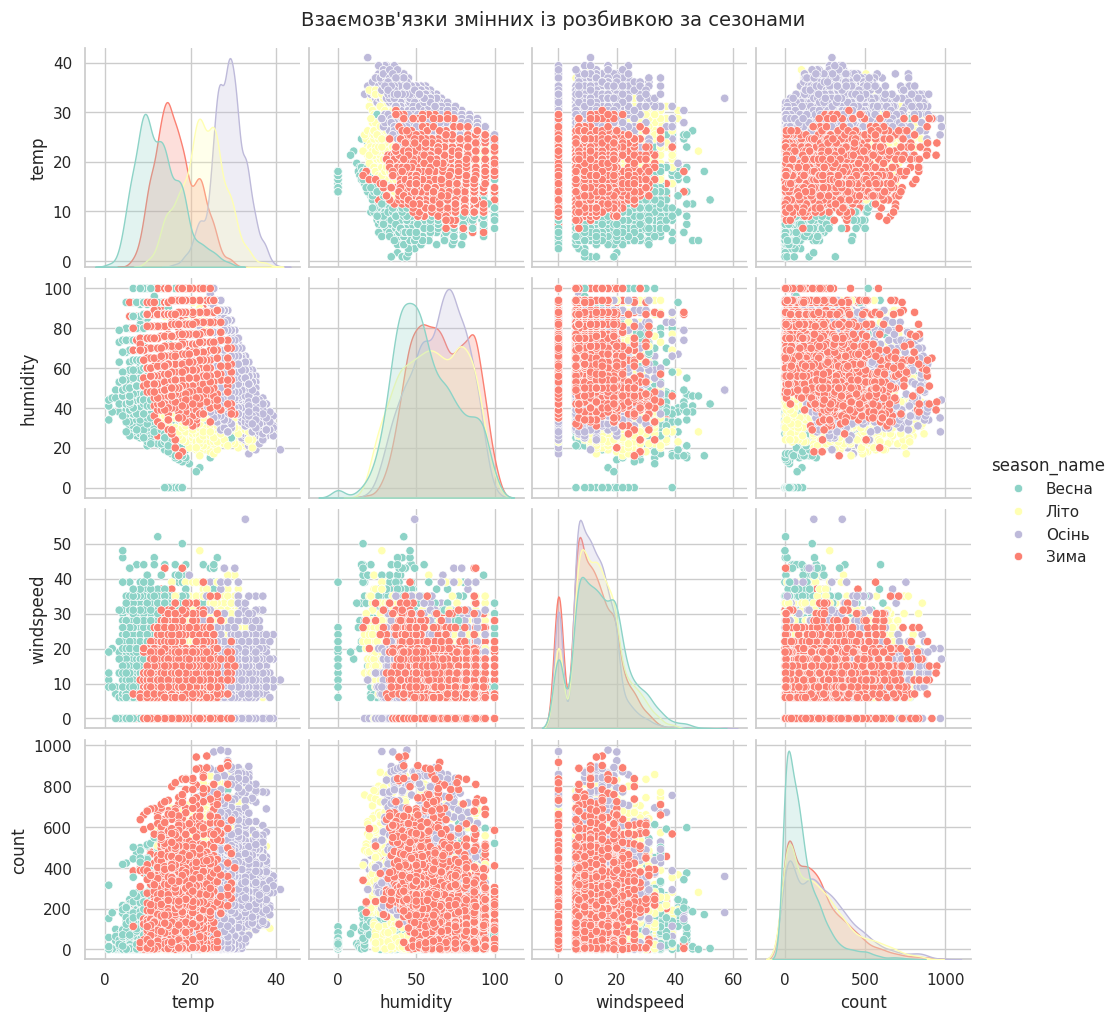

In [138]:
# Розшифровка сезонів
season_map = {1: "Весна", 2: "Літо", 3: "Осінь", 4: "Зима"}
df["season_name"] = df["season"].map(season_map)

sns.pairplot(
    data=df,
    vars=["temp", "humidity", "windspeed", "count"],
    hue="season_name",
    palette="Set3",
    diag_kind="kde"
)

plt.suptitle("Взаємозв'язки змінних із розбивкою за сезонами", y=1.02, fontsize=14)
plt.show()

### Між якими змінними спостерігається найсильніший лінійний зв'язок?
 - Найсильніший лінійний зв’язок - між temp та count. Чим тепліше, тим більше оренд.

### Яка характеристика найбільше змінюється від сезону?
  - Характеристика, що найбільше змінюється від сезону - temp.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

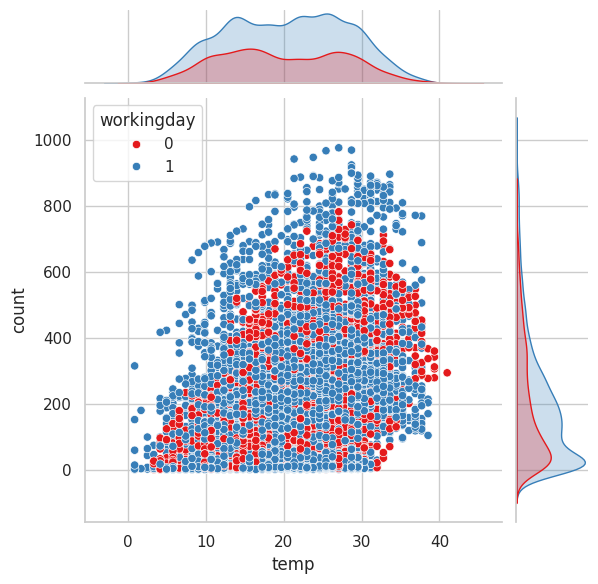

In [139]:
sns.jointplot(data=df, x="temp", y="count", palette="Set1", hue="workingday");

### Що показують графіки по краях?
- Графіки по краях — це розподіли (density plot) для двох змінних:

  - Верхній графік показує розподіл температури (temp) для робочих (синій) і неробочих (червоний) днів.

  - Бічний графік справа ілюструє розподіл загальної кількості оренд (count) для кожного типу дня.

- Ці розподіли дозволяють оцінити, при яких температурах і якій кількості оренд зосереджена основна маса даних, а також порівняти типи днів.

### Чи є різниця у поведінці користувачів у робочий і неробочий день?
 - Так є. У робочі дні люди орендують велосипеди частіше, і розподіл кількості оренд суттєво вище (очевидно пік у високих значеннях, можливо, завдяки поїздкам на роботу). У вихідні велосипедами користується менше людей і розкид значень виразно менший — події з понад 600–800 оренд майже немає.